## 사용한 패키지 버전

pandas 1.4.2 numpy 1.21.5 seaborn 0.12.0 matplotlib 3.5.1 statsmodel 0.13.2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import warnings

warnings.filterwarnings(action='ignore')
pd.options.display.float_format="{:.5f}".format
pd.options.display.max_columns = 40
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 데이터 불러오기
data=pd.read_csv('data/include_all_merge.csv')
data.head()

,Unnamed: 0,콜금리(%),loanapply_month,loanapply_day,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender,rehabilitation_yn,loanapply_week,loanapply_time,time_at_work,기준금리,생활물가지수,소비자심리지수,나이대,핀다,대출,금리
0,0,1.39000,3,1,475785,25,169,23000000.00000,16.90000,0.00000,666692.00000,1994.00000,940.00000,23000000.00000,EARNEDINCOME2,정규직,기타가족소유,10000000.00000,생활비,2.00000,11000000.00000,0.00000,0,Tuesday,13:59:32,0.00000,1.25000,1.20000,103.20000,20,23.00000,58.00000,20.00000
1,1,1.39000,3,1,475785,29,265,28000000.00000,5.90000,0.00000,666692.00000,1994.00000,940.00000,23000000.00000,EARNEDINCOME2,정규직,기타가족소유,10000000.00000,생활비,2.00000,11000000.00000,0.00000,0,Tuesday,13:59:31,0.00000,1.25000,1.20000,103.20000,20,23.00000,58.00000,20.00000
2,2,1.39000,3,1,475785,64,254,22000000.00000,13.20000,0.00000,666692.00000,1994.00000,940.00000,23000000.00000,EARNEDINCOME2,정규직,기타가족소유,10000000.00000,생활비,2.00000,11000000.00000,0.00000,0,Tuesday,13:59:32,0.00000,1.25000,1.20000,103.20000,20,23.00000,58.00000,20.00000
3,3,1.39000,3,1,475785,18,188,6000000.00000,5.30000,0.00000,666692.00000,1994.00000,940.00000,23000000.00000,EARNEDINCOME2,정규직,기타가족소유,10000000.00000,생활비,2.00000,11000000.00000,0.00000,0,Tuesday,13:59:31,0.00000,1.25000,1.20000,103.20000,20,23.00000,58.00000,20.00000
4,4,1.39000,3,1,475785,1,61,11000000.00000,12.90000,0.00000,666692.00000,1994.00000,940.00000,23000000.00000,EARNEDINCOME2,정규직,기타가족소유,10000000.00000,생활비,2.00000,11000000.00000,0.00000,0,Tuesday,13:59:32,0.00000,1.25000,1.20000,103.20000,20,23.00000,58.00000,20.00000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13442614 entries, 0 to 13442613
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   콜금리(%)             float64
 2   loanapply_month    int64  
 3   loanapply_day      int64  
 4   application_id     int64  
 5   bank_id            int64  
 6   product_id         int64  
 7   loan_limit         float64
 8   loan_rate          float64
 9   is_applied         float64
 10  user_id            float64
 11  birth_year         float64
 12  credit_score       float64
 13  yearly_income      float64
 14  income_type        object 
 15  employment_type    object 
 16  houseown_type      object 
 17  desired_amount     float64
 18  purpose            object 
 19  existing_loan_cnt  float64
 20  existing_loan_amt  float64
 21  gender             float64
 22  rehabilitation_yn  int64  
 23  loanapply_week     object 
 24  loanapply_time     object 
 25  time_at_work    

In [5]:
# 범주형 변수 제외 data
data2 = data.drop(['Unnamed: 0'],axis=1)
# is_applied가 null인 여부 기준

ii = data2[data2.is_applied.isnull()].index
train2 = data2.drop(ii)
test2 = data2.loc[ii]

### data 내의 범주형 변수들 더미화

In [4]:
# 필요없거나 다른 변수와 중복되어 존재하는 변수 제거
data1 = data.drop(['Unnamed: 0','loanapply_time','나이대'],axis=1)

In [5]:
data1 = pd.get_dummies(data1, columns = ['income_type','employment_type','houseown_type','purpose','loanapply_week'])

In [6]:
# data1 분리 -> train:3,4,5월 data / test:6월 data
# is_applied가 null인 여부 기준

ii = data1[data1.is_applied.isnull()].index
train = data1.drop(ii)
test = data1.loc[ii]

In [7]:
data1

,콜금리(%),loanapply_month,loanapply_day,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,gender,rehabilitation_yn,time_at_work,기준금리,...,employment_type_정규직,houseown_type_기타가족소유,houseown_type_배우자,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자,loanapply_week_Friday,loanapply_week_Monday,loanapply_week_Saturday,loanapply_week_Sunday,loanapply_week_Thursday,loanapply_week_Tuesday,loanapply_week_Wednesday
0,1.39000,3,1,475785,25,169,23000000.00000,16.90000,0.00000,666692.00000,1994.00000,940.00000,23000000.00000,10000000.00000,2.00000,11000000.00000,0.00000,0,0.00000,1.25000,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1.39000,3,1,475785,29,265,28000000.00000,5.90000,0.00000,666692.00000,1994.00000,940.00000,23000000.00000,10000000.00000,2.00000,11000000.00000,0.00000,0,0.00000,1.25000,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1.39000,3,1,475785,64,254,22000000.00000,13.20000,0.00000,666692.00000,1994.00000,940.00000,23000000.00000,10000000.00000,2.00000,11000000.00000,0.00000,0,0.00000,1.25000,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1.39000,3,1,475785,18,188,6000000.00000,5.30000,0.00000,666692.00000,1994.00000,940.00000,23000000.00000,10000000.00000,2.00000,11000000.00000,0.00000,0,0.00000,1.25000,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1.39000,3,1,475785,1,61,11000000.00000,12.90000,0.00000,666692.00000,1994.00000,940.00000,23000000.00000,10000000.00000,2.00000,11000000.00000,0.00000,0,0.00000,1.25000,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13442609,1.80000,6,30,1606784,35,29,5000000.00000,14.50000,NaN,399766.00000,1963.00000,690.00000,26000000.00000,17000000.00000,3.00000,28000000.00000,1.00000,0,0.00000,1.75000,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
13442610,1.80000,6,30,1606784,61,92,26000000.00000,19.70000,NaN,399766.00000,1963.00000,690.00000,26000000.00000,17000000.00000,3.00000,28000000.00000,1.00000,0,0.00000,1.75000,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
13442611,1.80000,6,30,1606784,13,262,35000000.00000,15.50000,NaN,399766.00000,1963.00000,690.00000,26000000.00000,17000000.00000,3.00000,28000000.00000,1.00000,0,0.00000,1.75000,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
13442612,1.80000,6,30,1606784,6,36,48000000.00000,17.70000,NaN,399766.00000,1963.00000,690.00000,26000000.00000,17000000.00000,3.00000,28000000.00000,1.00000,0,0.00000,1.75000,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


### 1. 상관계수 heatmap

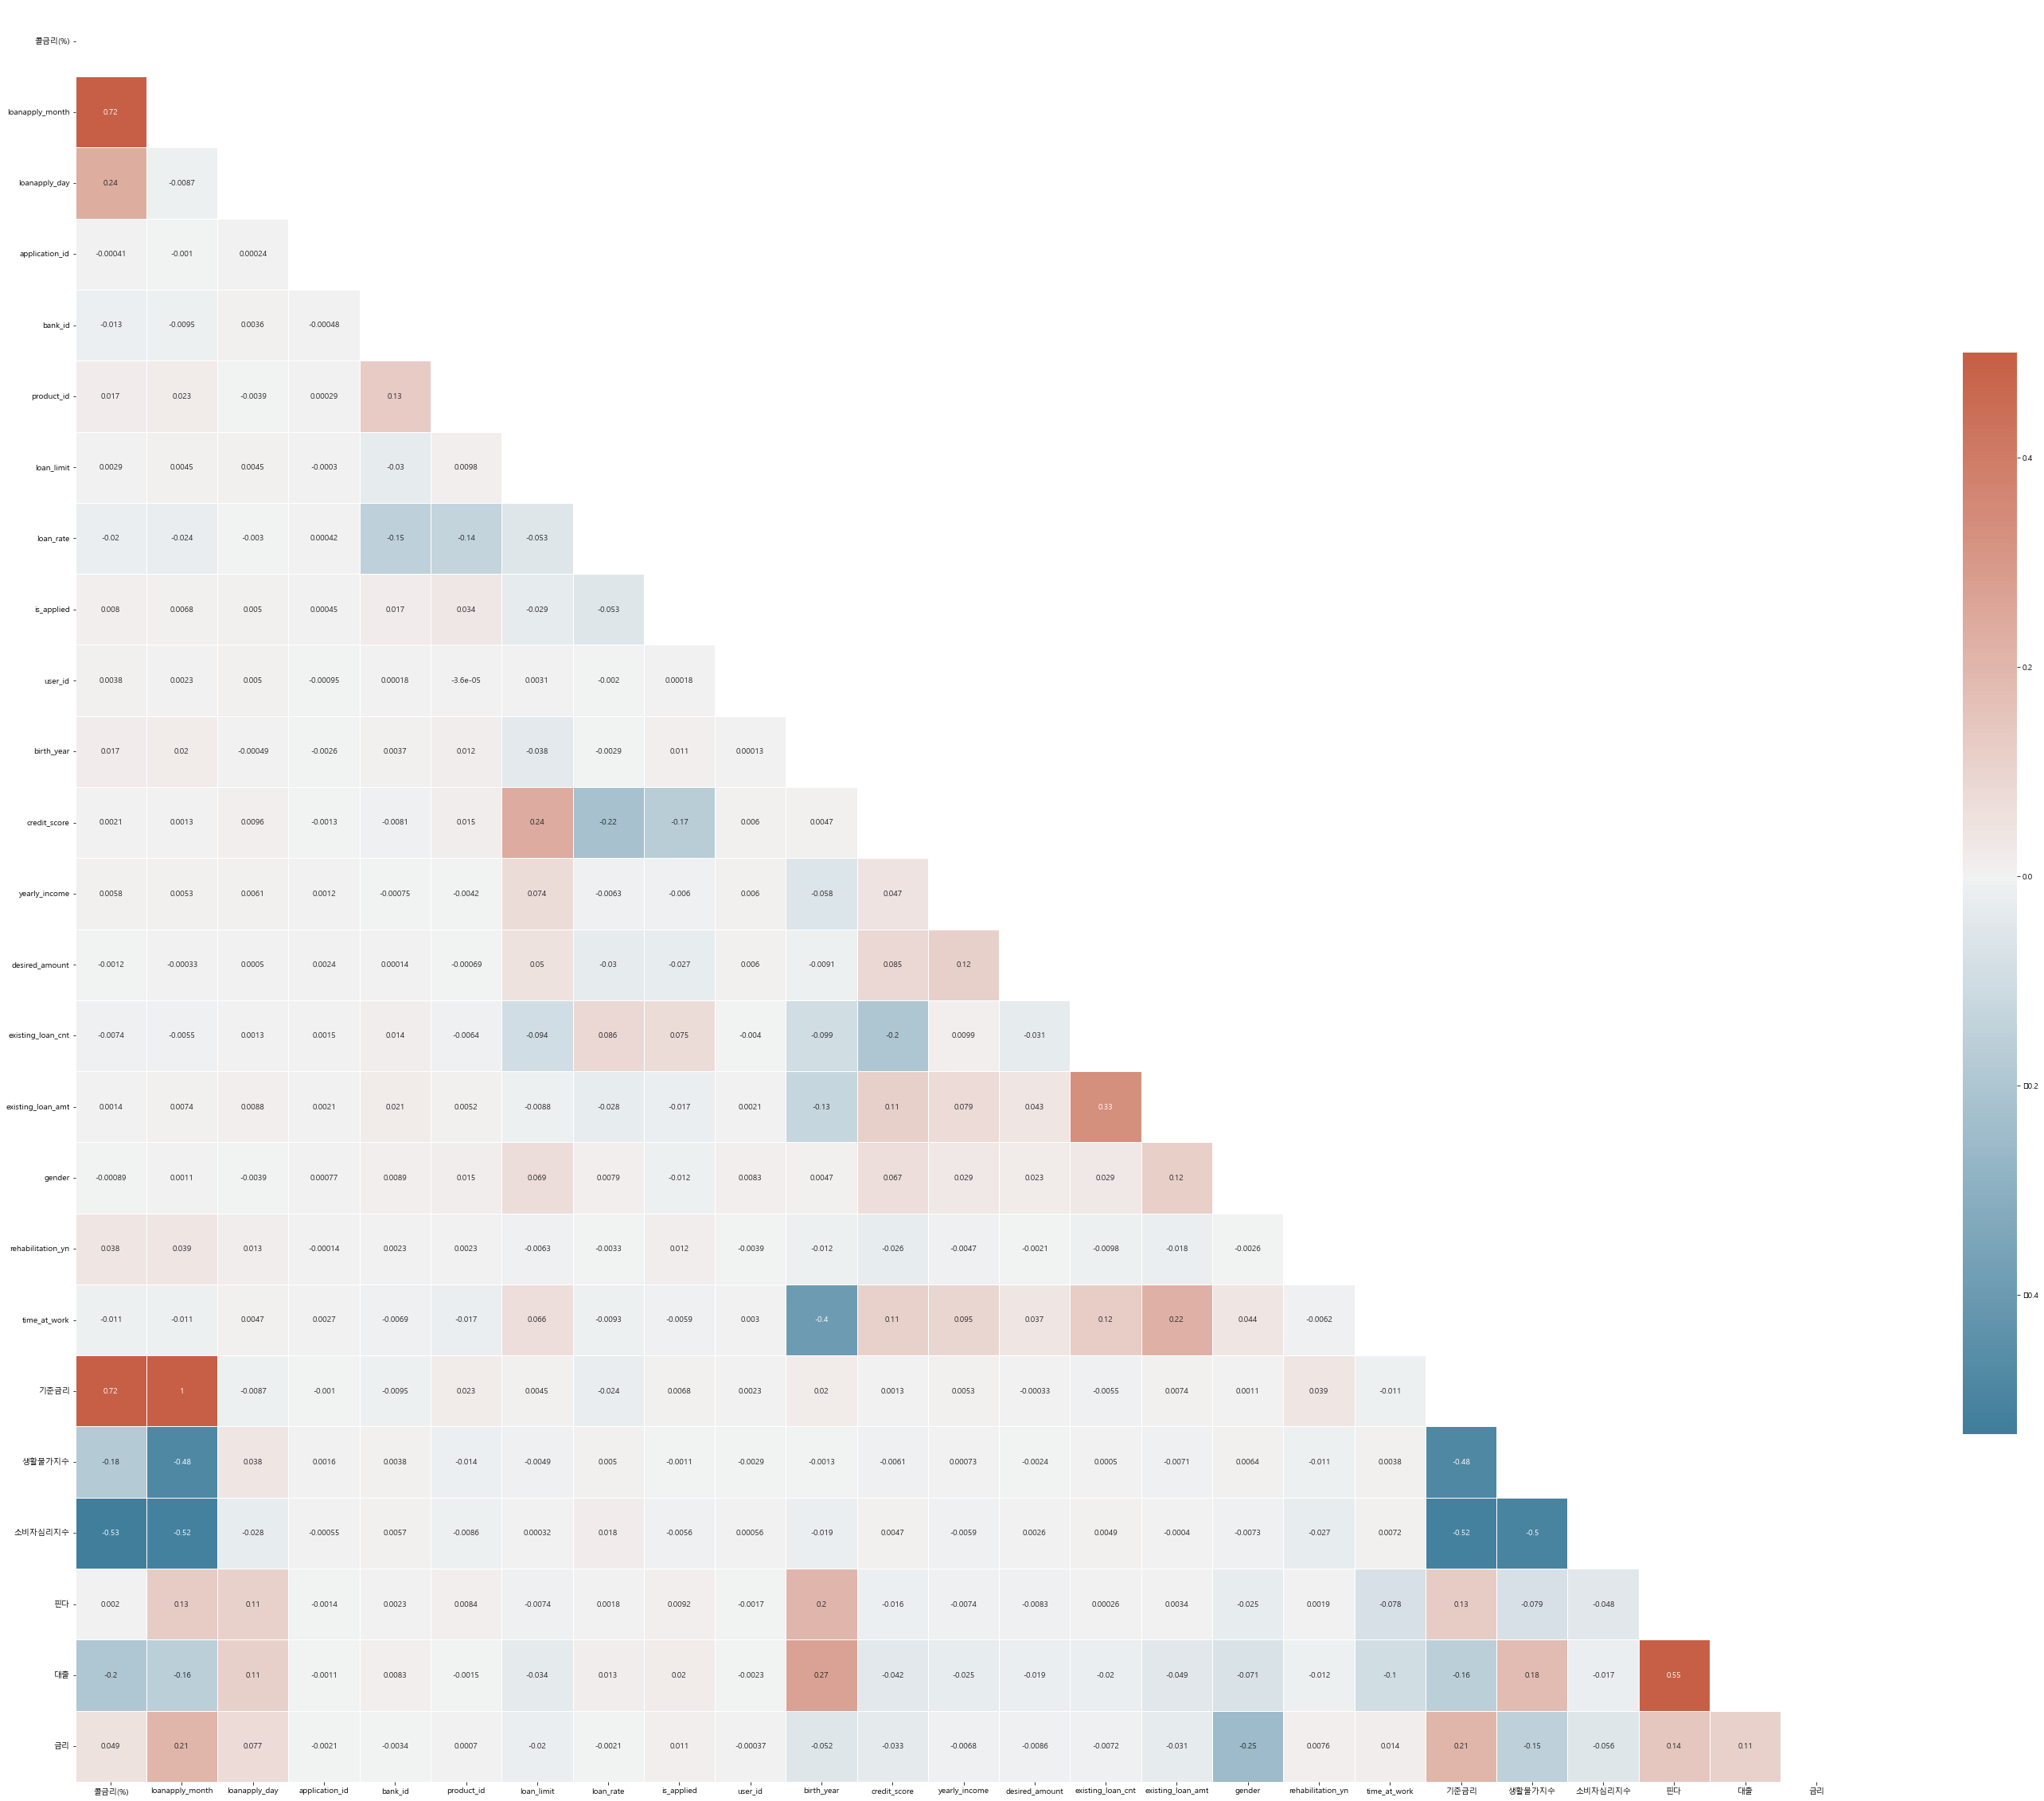

In [7]:
# 더미 제외 heatmap(data2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train2.corr()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train2.corr(), mask=mask, cmap=cmap, vmax=0.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.yticks(rotation=0)
plt.show()

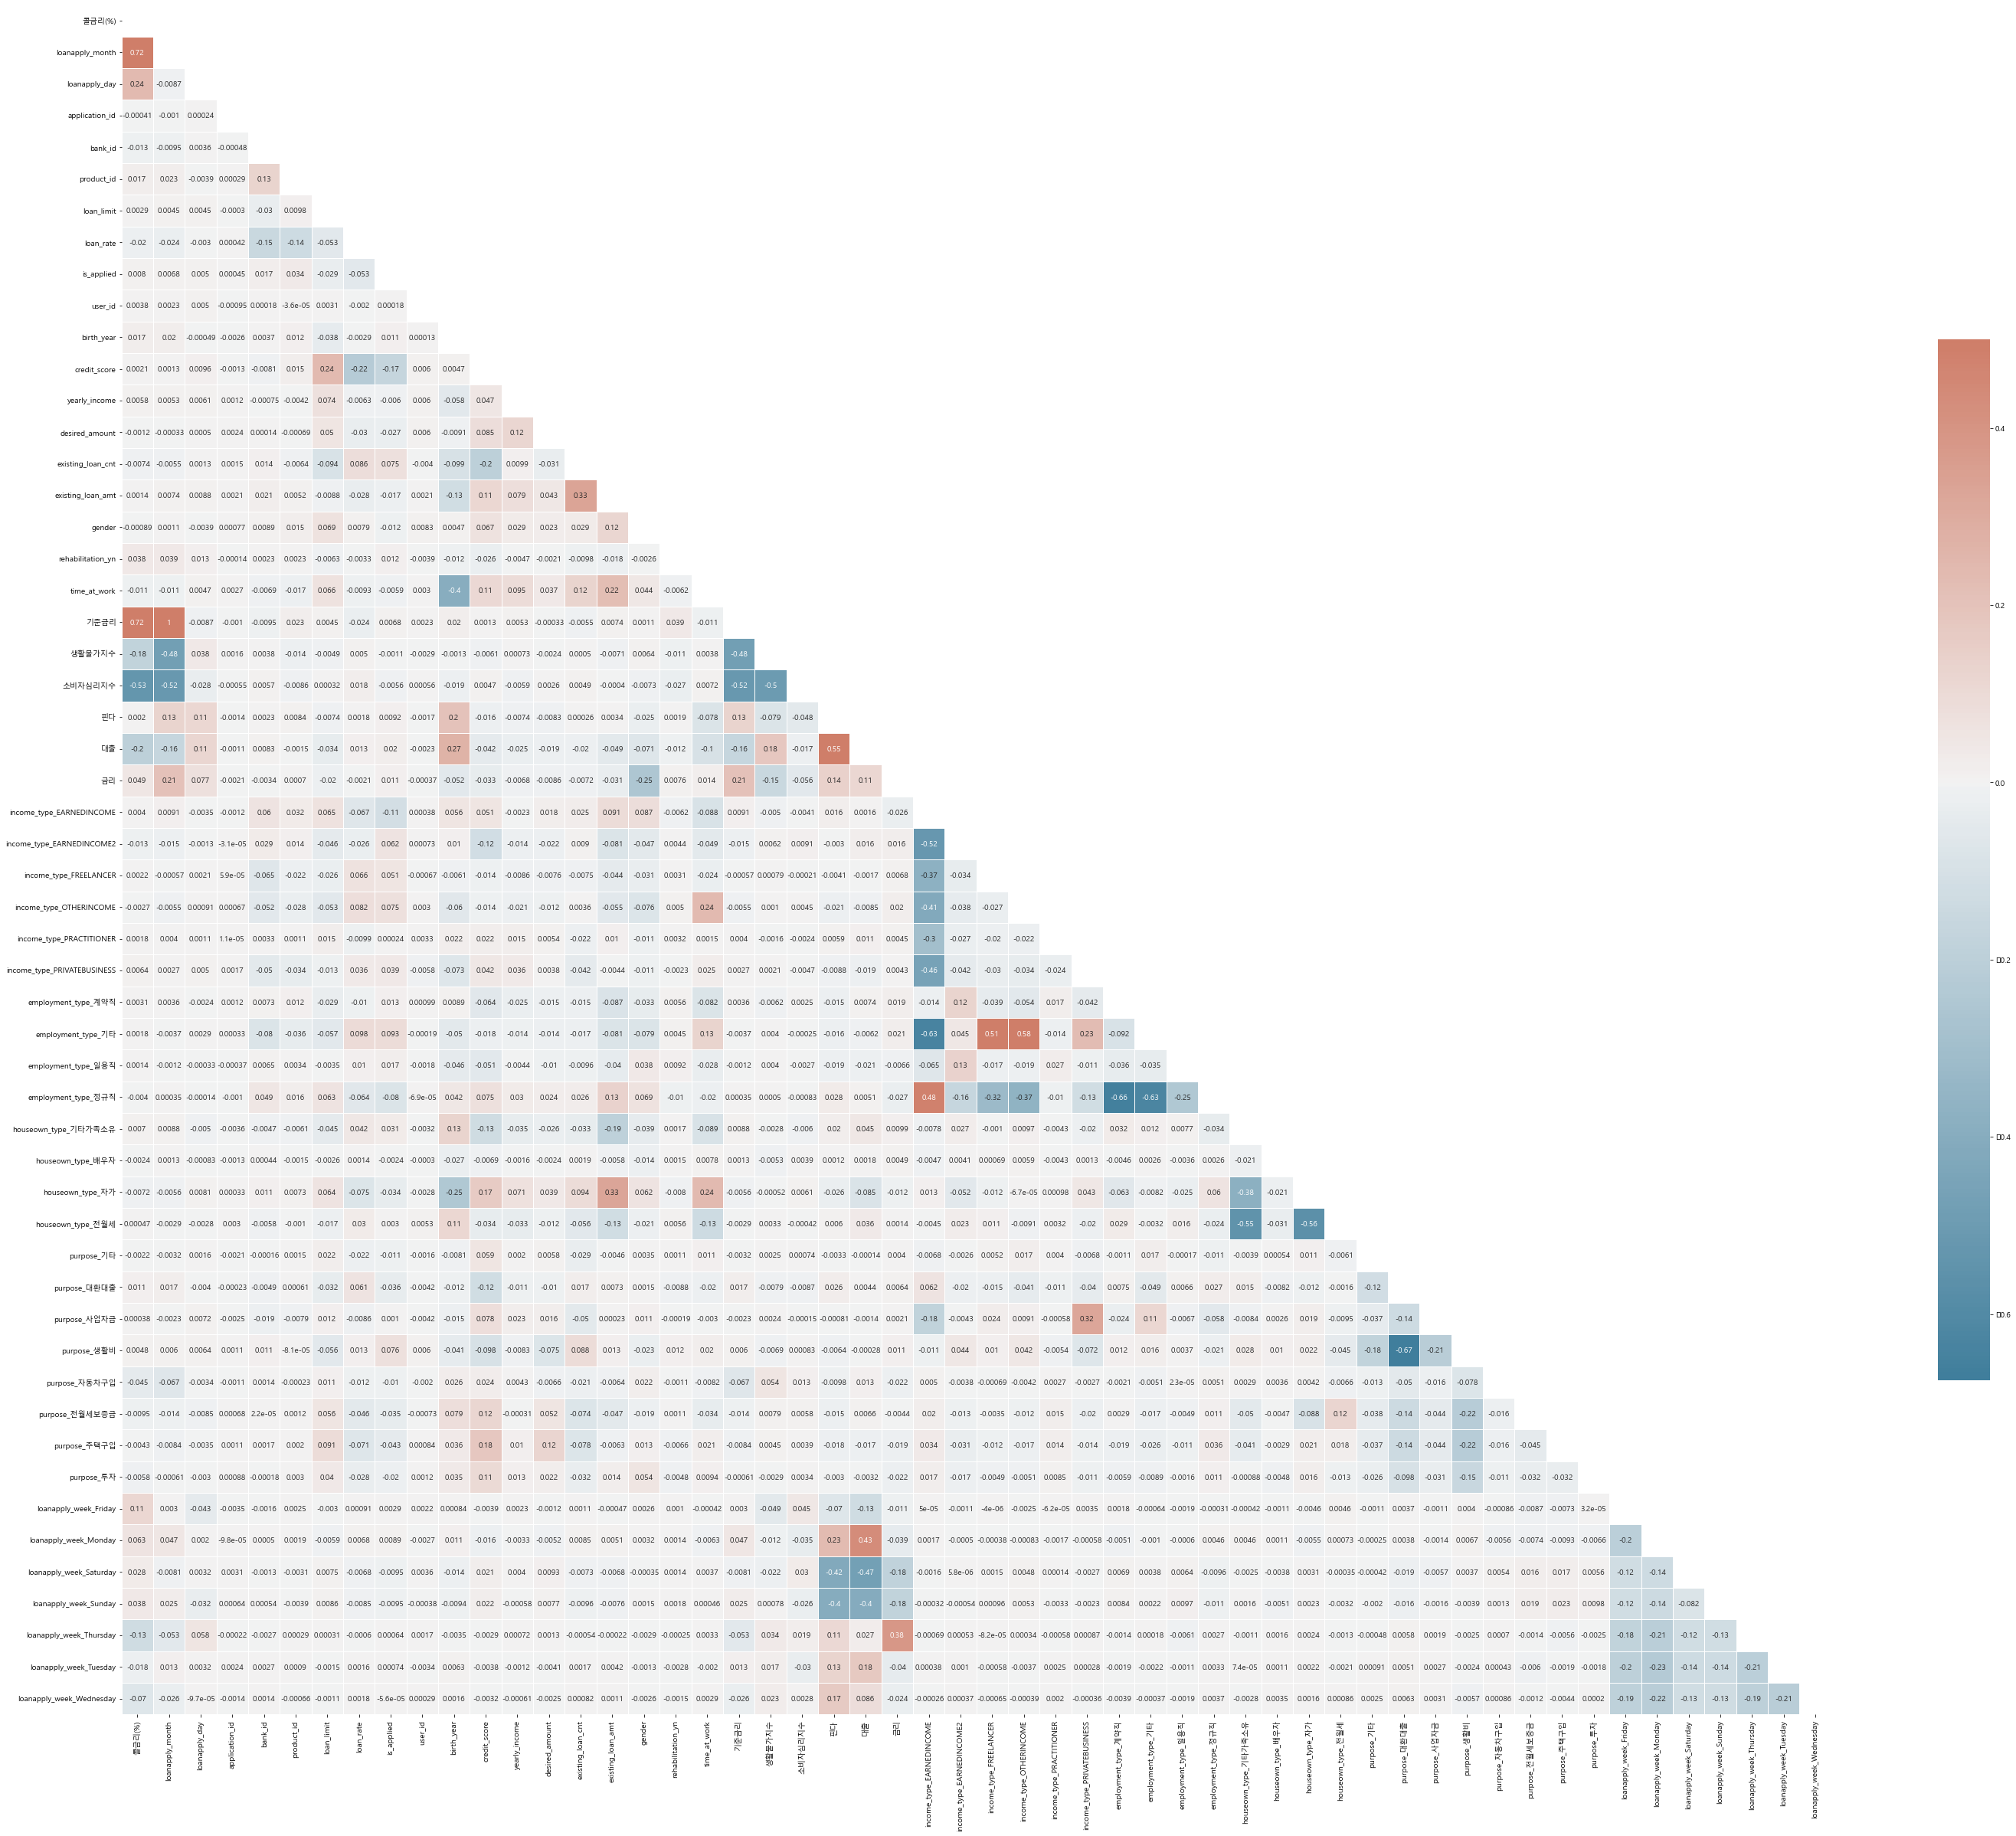

In [8]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train.corr()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train.corr(), mask=mask, cmap=cmap, vmax=0.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.yticks(rotation=0)
plt.show()

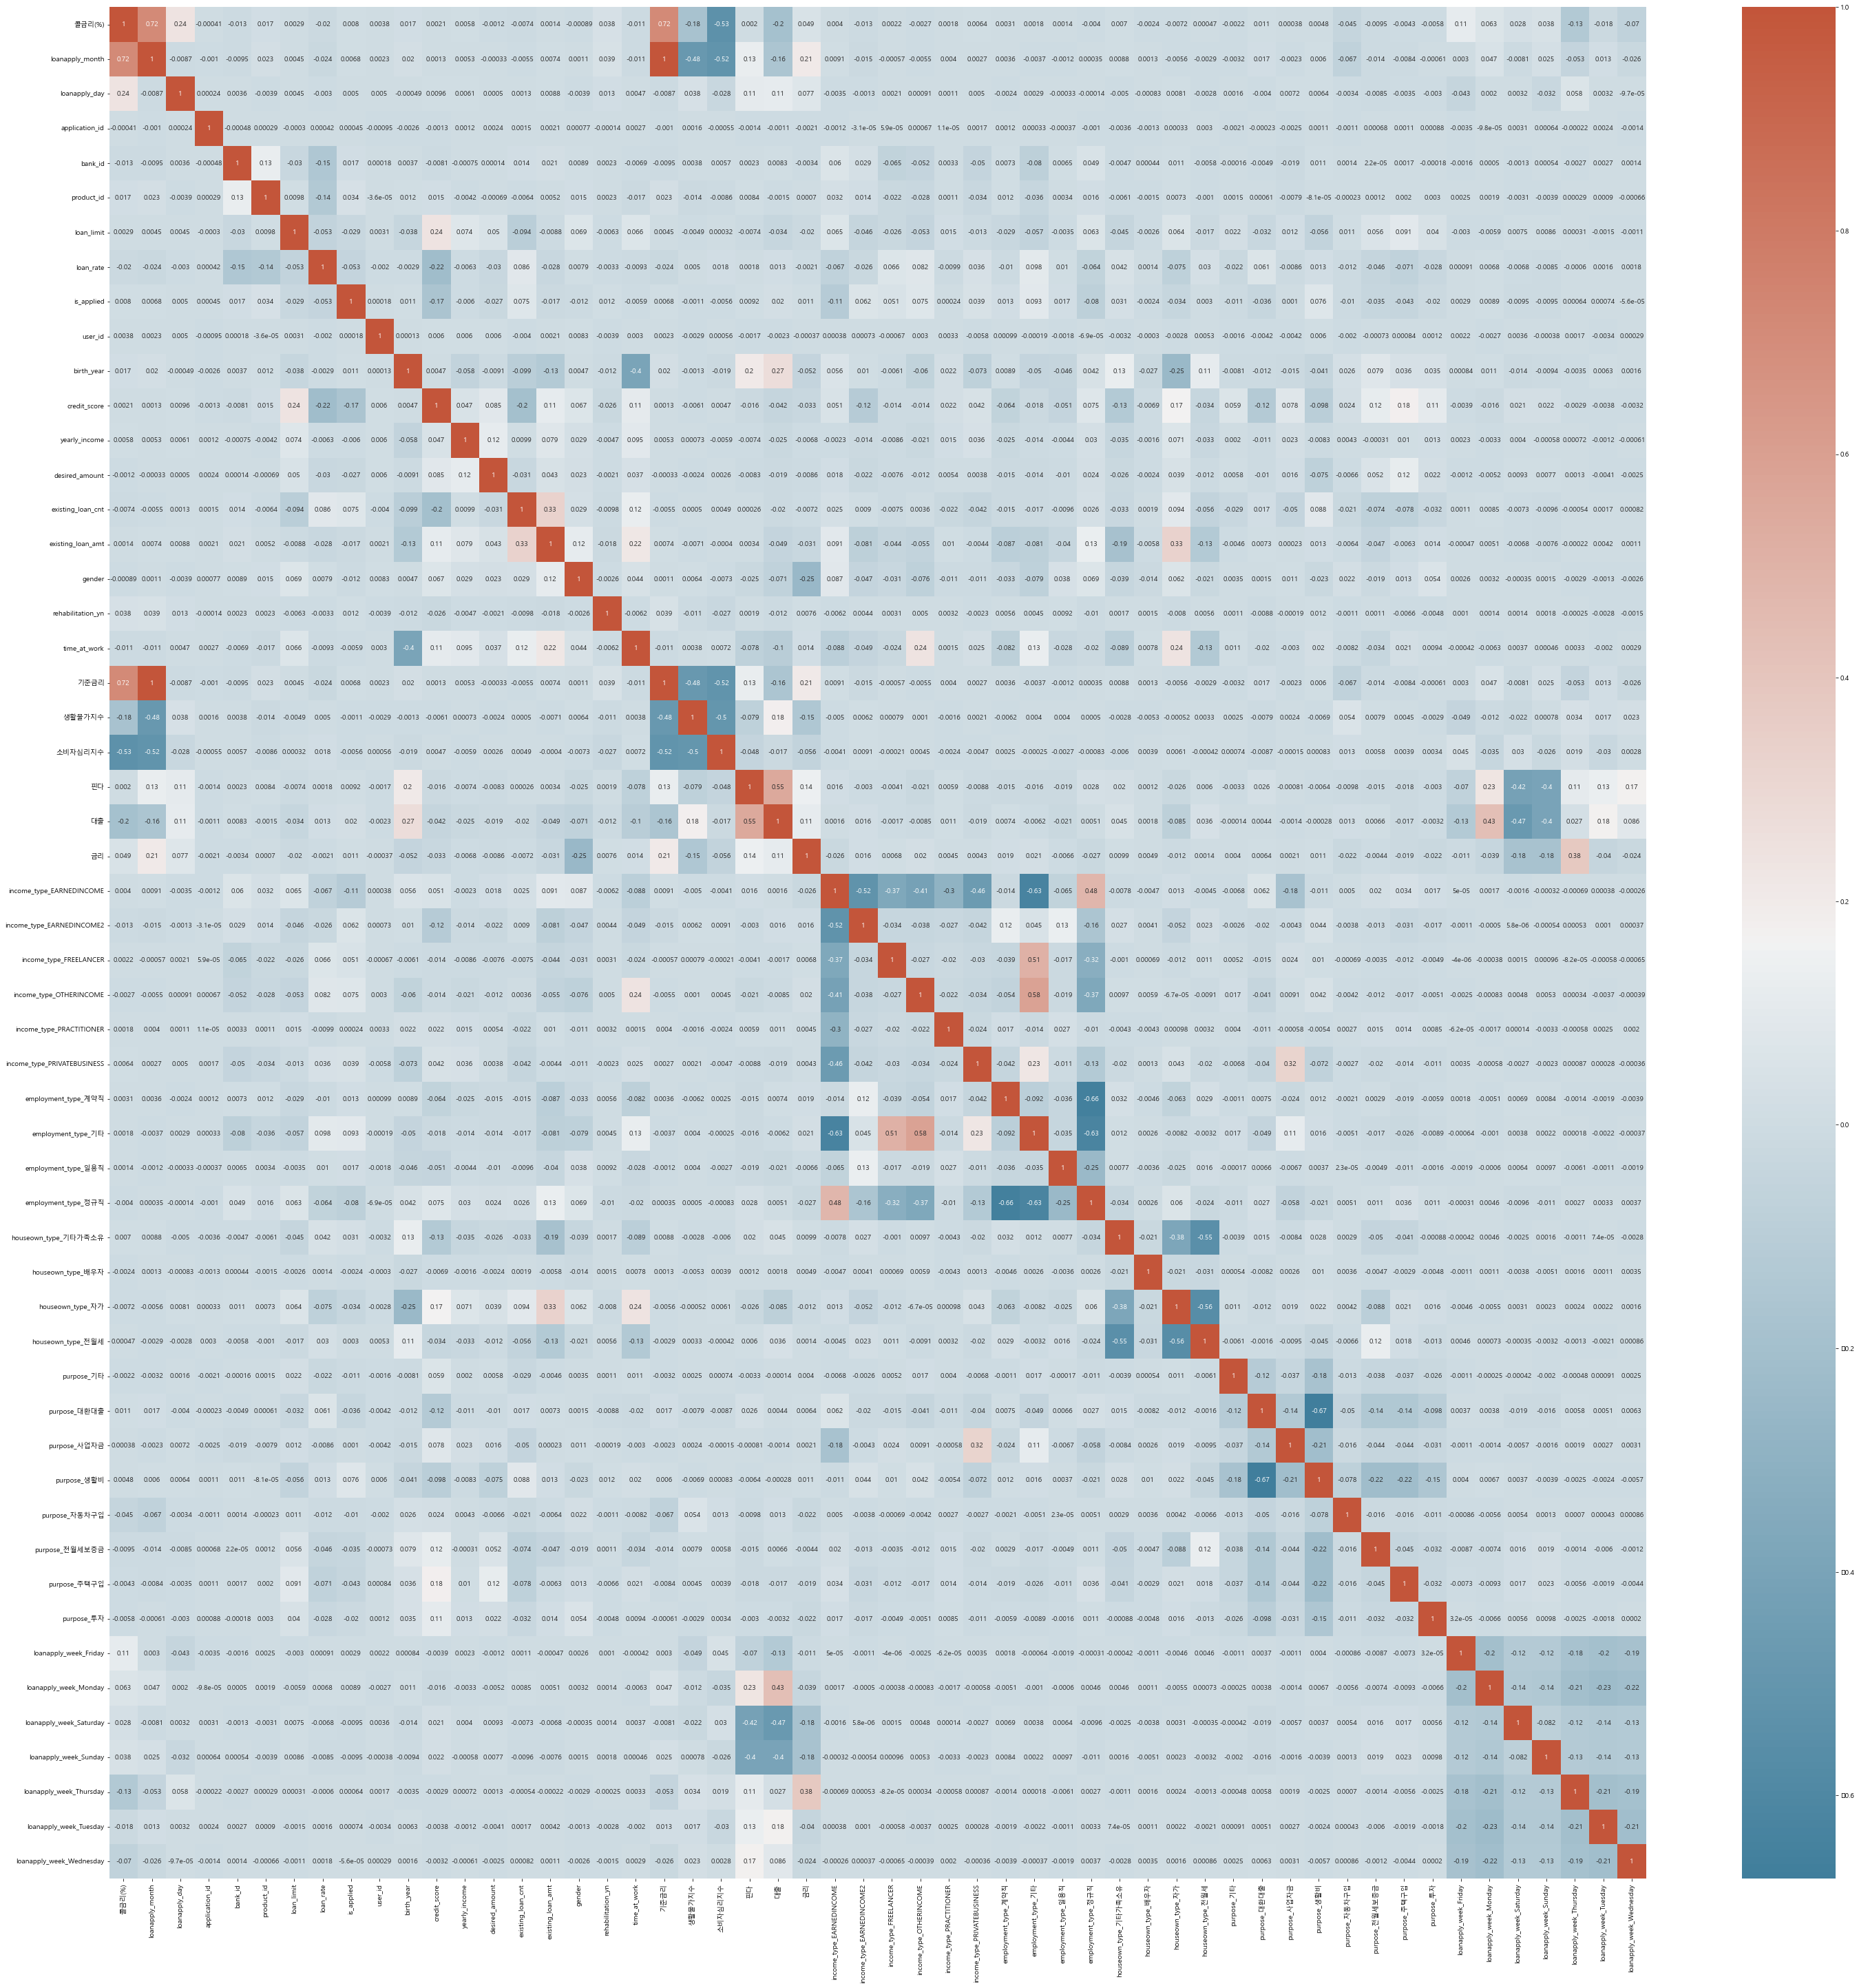

In [9]:
plt.figure(figsize=(50,50))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(train.corr(), cmap=cmap, annot=True)
plt.show()

### 상관계수 0.7 기준으로 하여 두 변수 중 is_applied 와의 상관계수가 더 낮은 'loanapply_month', '기준금리' drop

### 2. VIF 분산 분석

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
X_value = train.drop(['기준금리','loanapply_month','is_applied'],axis=1)
y_value = train['is_applied']

In [12]:
vif = pd.DataFrame()
vif["features"] = X_value.columns
vif["VIF Factor"] = [variance_inflation_factor(X_value.values, i) for i in range(X_value.shape[1])]
vif

,features,VIF Factor
0,콜금리(%),3.05057
1,loanapply_day,1.29765
2,application_id,1.00009
3,bank_id,1.04682
4,product_id,1.03422
5,loan_limit,1.08890
6,loan_rate,1.11654
7,user_id,1.00043
8,birth_year,1.53558
9,credit_score,1.31057
